# Parcial I - Métodos Computacionales

**2025-1**

---

Nombre:

Identificación:

---

* ⚠ Explique su código usando con comentarios,

* ❗Todas las funciones deben tener documentación básica,

* 🛑 El uso de IA's no está permitido,

* ⚛ La interpretación del enunciado hace parte de la evaluación,

* ⏲ Este parcial tiene una duración de 2 horas

In [ ]:
# Librerias útiles
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from math import factorial
from scipy.optimize import root_scalar, newton, bisect # Funciones para raices

## Ayudas
# np.sign (Signo de una variable)
# np.deg2rad (Convertir grados a radianes)
# pd.Dataframe Genera un dataframe a partir de un diccionario o listas
# range(0, 10, 2) (Pasos de 2 comenzando en 0 hasta 10)

# 1

**(40 puntos)** El **método de Ridder** es un algoritmo de búsqueda de raíces que, como la bisección, requiere un intervalo $[a, b]$ tal que $f(a) \cdot f(b) < 0$. A diferencia de la bisección, Ridder introduce una corrección exponencial para acelerar la convergencia, logrando **convergencia cuadrática** sin requerir derivadas.

---
### Pasos para implementar

1. **Definir la función** $f(x)$ y un intervalo $[a, b]$ tal que:

   - $f(a) \cdot f(b) < 0$ (la función tiene signos opuestos en los extremos del intervalo).
   - La función debe ser continua en $[a, b]$.

2. **Calcular el punto medio**:

   $$
   m = \frac{a + b}{2}
   $$

3. **Calcular la corrección exponencial**:

   - Evaluar $f(a)$, $f(b)$ y $f(m)$.
   - Calcular:

     $$
     s = \sqrt{f(m)^2 - f(a) f(b)}
     $$

   - Si $s = 0$, detener: la raíz no puede estimarse en esta iteración.

   - Calcular el nuevo candidato a raíz:

     $$
     x = m + \frac{(m - a) f(m)}{s} \cdot \text{sign}(f(a) - f(b))
     $$

4. **Evaluar $f(x)$** y actualizar el intervalo:

   - Si $f(m) \cdot f(x) < 0$, entonces la nueva raíz está entre $m$ y $x$.
   - Si $f(a) \cdot f(x) < 0$, entonces actualizar $b = x$, luego $f(b) = f(x)$.
   - Si $f(b) \cdot f(x) < 0$, entonces actualizar $a = x$, luego $f(a) = f(x)$.
   - En cada paso mantener la condición $f(a) \cdot f(b) < 0$.

5. **Criterio de parada**:

   - Repetir los pasos anteriores hasta que se alcance la tolerancia deseada:

     $$
     |f(x)| < \varepsilon \quad \text{o} \quad |b - a| < \delta
     $$

   donde $\varepsilon$ y $\delta$ son tolerancias establecidas por el usuario.

---

* Defina una función llamada `Ridder` que calcule la raiz de una función dada. Su función debe tener documentación y retornar el valor de la raiz junto con el número de iteraciones empleadas para alcanzar la convergencia dada una tolerancia.

* Usando
$$\cos(x) = x,$$

Grafique la función para $0\leq x \leq \pi/2$ usando 100 puntos. Luego, cree un DataFrame con los datos de $x$ y $f(x)$, y encuentre una primera aproximación a la raiz aplicando un filtro en el dataframe con los valores más cercanos a cero.

* Usando el método de Ridder encuentre la raiz númericamente y compare su resultado usando el método de bisección y secante.

* Para las siguientes tolerancias (ver código) realice un gráfico usando escala logaritimica en $y$ de cuantas iteraciones son necesarias hasta alcanzar la convergencia. ¿Qué puede concluir acerca de la misma?

```python
# Tolerancias
tol = np.logspace(-1, -20, 20)

# Grafico semilog

plt.semilogy(N, tol)

```

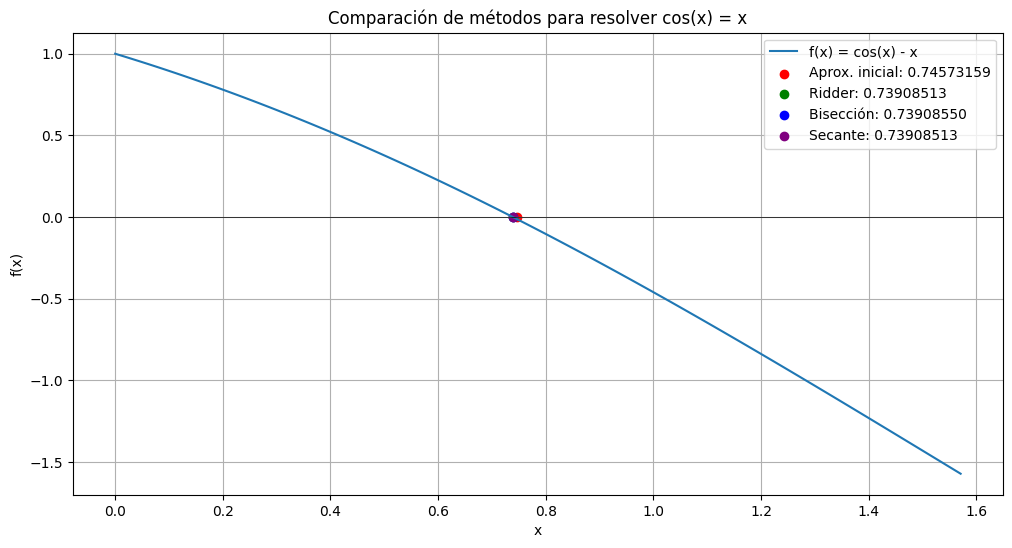

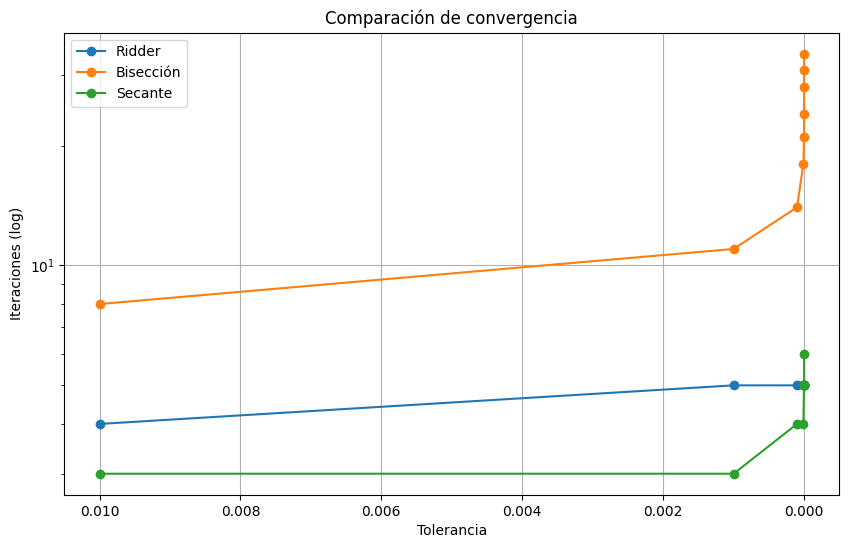


Resultados comparativos:
Método de Ridder: 0.739085133215 en 5 iteraciones
Método de Bisección: 0.739085500758
Método de la Secante: 0.739085133215


In [20]:
# Aquí va su código
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.optimize import root_scalar, newton, bisect
def Ridder(f,a,b,tol=1e-6,max_iter=100):

#encuentra la raiz de f en el intervalo [a,b], con el metodo de rider'
#a,b (float), extremos de intervalo'
#tol=tolerancia'
#max_int, numero de iteraciones maximo'
#retorna x:float, aproximaciones de la raiz de f y numero de ite'
    fa=f(a)
    fb=f(b)
    if fa*fb>=0:
      raise ValueError("LA FUNCION DEBE CAMBIAR SIGNO EN [a,b]")
    iterations=0
    for _ in range(max_iter):
        iterations +=1
        c=(a+b)/2 # c es el punto medio de intervalo [a,b]
        fc=f(c)
        # aplicando el metodo
        d=c+(c-a)*np.sign(fa-fb)*fc/np.sqrt(fc**2-fa*fb)
        fd=f(d)
        if fc*fd<0:
          a,b,fa,fb=c,d,fc,fd
        elif fa*fd<0:
          b,fb=d,fd
        else:
            a, fa=d, fd
        if abs(b-a)<tol or fd==0:
           return  d, iterations
    return  d, iterations
#definimos la funcion y parametros
f=lambda x: np.cos(x)-x
a,b=0, np.pi/2
x_vals=np.linspace(a,b,100)
y_vals=f(x_vals)
#encontramos la aproximacion

df = pd.DataFrame({'x': x_vals, 'f(x)': y_vals})
approx_root = df.iloc[(df['f(x)'].abs()).argsort()[0]]['x']

# calculamos raices con diferentes métodos
ridder_root, ridder_iter = Ridder(f, a, b)
bisect_root = bisect(f, a, b, rtol=1e-6)
secant_root = newton(f, x0=0.5, tol=1e-6)

# gráfico comparativo
plt.figure(figsize=(12, 6))
plt.plot(x_vals, y_vals, label='f(x) = cos(x) - x')
plt.axhline(0, color='black', linewidth=0.5)

# marcamos todas las raíces
methods = {
    'Aprox. inicial': (approx_root, 'red'),
    'Ridder': (ridder_root, 'green'),
    'Bisección': (bisect_root, 'blue'),
    'Secante': (secant_root, 'purple')
}

for name, (root, color) in methods.items():
    plt.scatter(root, 0, color=color, label=f'{name}: {root:.8f}')

plt.xlabel('x'), plt.ylabel('f(x)')
plt.title('Comparación de métodos para resolver cos(x) = x')
plt.grid(True), plt.legend()
plt.show()

# análisis de convergencia
tolerances = np.logspace(-2, -10, 9)
results = {'Tolerancia': tolerances}

def secant_iterations(f, x0, x1, tol):
    iterations = 0
    while abs(x1 - x0) > tol and iterations < 100:
        iterations += 1
        x2 = x1 - f(x1) * (x1 - x0)/(f(x1) - f(x0))
        x0, x1 = x1, x2
    return iterations

results['Ridder'] = [Ridder(f, a, b, tol=tol)[1] for tol in tolerances]
results['Bisección'] = [int(np.ceil(np.log2((b - a)/tol))) for tol in tolerances]
results['Secante'] = [secant_iterations(f, 0.5, 1.0, tol) for tol in tolerances]

# grafaico de convergencia
plt.figure(figsize=(10, 6))
for method in ['Ridder', 'Bisección', 'Secante']:
    plt.semilogy(tolerances, results[method], 'o-', label=method)
plt.gca().invert_xaxis()
plt.xlabel('Tolerancia'), plt.ylabel('Iteraciones (log)')
plt.title('Comparación de convergencia'), plt.grid(True)
plt.legend(), plt.show()

# resultados numéricos
print("\nResultados comparativos:")
print(f"Método de Ridder: {ridder_root:.12f} en {ridder_iter} iteraciones")
print(f"Método de Bisección: {bisect_root:.12f}")
print(f"Método de la Secante: {secant_root:.12f}")



#2

**(60 puntos)** En óptica, cuando un rayo de luz atraviesa la interfaz entre dos medios con diferentes índices de refracción, su dirección cambia según la ley de Snell. Para el caso de un prisma triangular, cuando un rayo emerge después de dos refracciones, el ángulo de desviación total $\delta$ está dado por:

$$\delta(\theta_i) = \theta_i + \arcsin\left(n\sin\left(A - \arcsin\left(\frac{\sin\theta_i}{n}\right)\right)\right) - A$$

donde $\theta_i$ es el ángulo de incidencia, $n$ es el índice de refracción del prisma y $A$ es el ángulo del prisma.

La derivada de esta función con respecto al ángulo de incidencia $\theta_i$ es:

$$\frac{d\delta}{d\theta_i} = 1 - \frac{\cos\theta_i \cdot \cos(A-\theta_r)}{\cos\theta_r \cdot \sqrt{1-n^2\sin^2(A-\theta_r)}}$$

donde $\theta_r = \arcsin\left(\frac{\sin\theta_i}{n}\right)$ es el ángulo de refracción en la primera interfaz.

Considere un prisma de vidrio crown con $n = 1.52$ y $A = 60°$.

### Parte A:
* Escriba una función explicita y documentada para $\frac{d\delta}{d\theta_i}$

* Realice un gráfico para $\frac{d\delta}{d\theta_i}$ y encuentre el ángulo de incidencia $\theta_i$ que produce el ángulo de desviación mínimo para $\theta_i \in [30°, 80°]$.

* Use el método de Newton-Raphson (sin derivada) y el método de la secante para hallar el ángulo de desviación mínimo.


### Parte B:
* Determine el ángulo crítico $\theta_c$ para el cual el rayo comienza a experimentar reflexión interna total en la segunda interfaz del prisma. Esta condición ocurre cuando:

$$\sin(A - \theta_r) = \frac{1}{n}$$

* Resuelva numéricamente la ecuación anterior para encontrar el ángulo de incidencia $\theta_i$ correspondiente a este ángulo crítico, utilizando el método de la bisección.





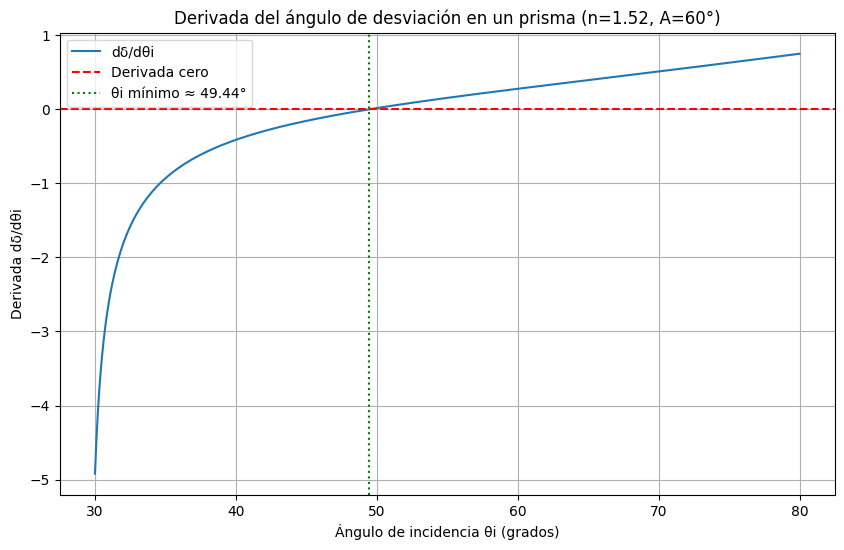

Newton-Raphson: θi = 49.464198°, δ_min = 38.928396°
Error en método secante: x0 must not be None for secant

Valor teórico: δ_min = 38.928396°


In [ ]:
# Aquí va su código
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from math import factorial
from scipy.optimize import root_scalar, newton, bisect # Funciones para raices
def calcular_desviacion(theta_i,n=1.52,A=np.radians(60)):
  #calcula el angulo de desviacion delta para un prisma
  theta_r1=np.arcsin(np.sin(theta_i)/n)
  theta_i2=A-theta_r1
  if np.sin(theta_i2)>1/n:
    return np.nan
  theta_r2=np.arcsin(n*np.sin(theta_i2))
  return theta_i+theta_r2 - A
def derivada_desviacion(theta_i, h=1e-6, n=1.52, A=np.radians(60)):
    """
    Calcula la derivada numérica del ángulo de desviación respecto al ángulo de incidencia.

    Parámetros:
    theta_i : ángulo de incidencia en radianes
    h : paso para derivada numérica (default 1e-6)
    n : índice de refracción (default 1.52)
    A : ángulo del prisma en radianes (default 60°)

    Retorna:
    ddelta/dtheta_i : derivada numérica
    """
    delta_plus = calcular_desviacion(theta_i + h, n, A)
    delta_minus = calcular_desviacion(theta_i - h, n, A)

    if np.isnan(delta_plus) or np.isnan(delta_minus):
        return np.nan

    return (delta_plus - delta_minus) / (2*h)

# configuración del problema
n = 1.52  # indice de refracción del vidrio crown
A_deg = 60  # angulo del prisma en grados
theta_range = np.linspace(30, 80, 500)  # Rango de ángulos de incidencia

# Cálculo de la derivada
theta_rad = np.radians(theta_range)
derivadas = [derivada_desviacion(t) for t in theta_rad]

# gráfico de la derivada
plt.figure(figsize=(10, 6))
plt.plot(theta_range, derivadas, label='dδ/dθi')
plt.axhline(0, color='red', linestyle='--', label='Derivada cero')
plt.xlabel('Ángulo de incidencia θi (grados)')
plt.ylabel('Derivada dδ/dθi')
plt.title('Derivada del ángulo de desviación en un prisma (n=1.52, A=60°)')
plt.grid(True)

# encontrar el mínimo visualmente
cero_idx = np.where(np.diff(np.sign(derivadas)))[0]
if len(cero_idx) > 0:
    theta_min_deg = theta_range[cero_idx[0]]
    plt.axvline(theta_min_deg, color='green', linestyle=':',
                label=f'θi mínimo ≈ {theta_min_deg:.2f}°')

plt.legend()
plt.show()

# métodos numéricos para encontrar el mínimo exacto
def objetivo(theta_deg):
    return derivada_desviacion(np.radians(theta_deg))

# newton-Raphson (sin derivada analítica)
try:
    theta_min_NR = newton(objetivo, x0=50, tol=1e-6)
    delta_min_NR = calcular_desviacion(np.radians(theta_min_NR))
    print(f"Newton-Raphson: θi = {theta_min_NR:.6f}°, δ_min = {np.degrees(delta_min_NR):.6f}°")
except Exception as e:
    print(f"Error en Newton-Raphson: {e}")

# Método de la secante
try:
    result = root_scalar(objetivo, bracket=[40, 60], method='secant', xtol=1e-6)
    if result.converged:
        delta_min_sec = calcular_desviacion(np.radians(result.root))
        print(f"Método secante: θi = {result.root:.6f}°, δ_min = {np.degrees(delta_min_sec):.6f}°")
    else:
        print("El método de la secante no convergió")
except Exception as e:
    print(f"Error en método secante: {e}")

# valor teórico para comparación
A_rad = np.radians(A_deg)
theta_min_teorico = np.arcsin(n*np.sin(A_rad/2))
delta_min_teorico = 2*theta_min_teorico - A_rad
print(f"\nValor teórico: δ_min = {np.degrees(delta_min_teorico):.6f}°")

